# Section 2

## Efstathios Galanakis 03112172
## Ioannis Tzanettis 03112506
## Team Number: 83



Datasheet Name: SECOM
Number of features: 1567
Number of classes: 591


# Insert Data

First we read data from file and we separate train data from test data.


In [127]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

perc = 0.3
k = 5

features = []
labels = []

labels_path = './big/secom_labels.data'
datasheet_labels = pd.read_csv(labels_path, header=None, delim_whitespace=True)
mapping={-1:0}
labels = datasheet_labels.replace(mapping).values[:,0].flatten()
labels = np.float64(labels)
print labels

[ 0.  0.  1. ...,  0.  0.  0.]


After reading we have to replace missing values

In [128]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

features_path = './big/secom.data'
datasheet_features = pd.read_csv(features_path, header=None, delim_whitespace=True)
features = imp.fit_transform(datasheet_features)
print features


[[  3.03093000e+03   2.56400000e+03   2.18773330e+03 ...,   1.64749042e-02
    5.28333333e-03   9.96700663e+01]
 [  3.09578000e+03   2.46514000e+03   2.23042220e+03 ...,   2.01000000e-02
    6.00000000e-03   2.08204500e+02]
 [  2.93261000e+03   2.55994000e+03   2.18641110e+03 ...,   4.84000000e-02
    1.48000000e-02   8.28602000e+01]
 ..., 
 [  2.97881000e+03   2.37978000e+03   2.20630000e+03 ...,   8.60000000e-03
    2.50000000e-03   4.35231000e+01]
 [  2.89492000e+03   2.53201000e+03   2.17703330e+03 ...,   2.45000000e-02
    7.50000000e-03   9.34941000e+01]
 [  2.94492000e+03   2.45076000e+03   2.19544440e+03 ...,   1.62000000e-02
    4.50000000e-03   1.37784400e+02]]


After we replace the missing value, it's time to seperate train and test data

In [129]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=perc, random_state=20)
print features

[[  3.03093000e+03   2.56400000e+03   2.18773330e+03 ...,   1.64749042e-02
    5.28333333e-03   9.96700663e+01]
 [  3.09578000e+03   2.46514000e+03   2.23042220e+03 ...,   2.01000000e-02
    6.00000000e-03   2.08204500e+02]
 [  2.93261000e+03   2.55994000e+03   2.18641110e+03 ...,   4.84000000e-02
    1.48000000e-02   8.28602000e+01]
 ..., 
 [  2.97881000e+03   2.37978000e+03   2.20630000e+03 ...,   8.60000000e-03
    2.50000000e-03   4.35231000e+01]
 [  2.89492000e+03   2.53201000e+03   2.17703330e+03 ...,   2.45000000e-02
    7.50000000e-03   9.34941000e+01]
 [  2.94492000e+03   2.45076000e+03   2.19544440e+03 ...,   1.62000000e-02
    4.50000000e-03   1.37784400e+02]]


# Baseline classification
After splitting data, time to create dummy classifiers, GaussianNaiveBayes, kNN and MLP Classifier using default parameters

In [130]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

conf = []
macro = []
weighted = []
precision = []
recall = []
time_array = []

# Naive Bayes
clf_names = ["Gaussian"]
bayessian = GaussianNB()

start_time = time.time()    
bayessian.fit(train_data, train_labels)
time_array += [ time.time() - start_time]

results = bayessian.predict(test_data)

conf.append( confusion_matrix(test_labels, results))
macro.append( f1_score(test_labels, results, average='macro'))
weighted.append(f1_score(test_labels, results, average='weighted'))
precision.append(  precision_score(test_labels, results))
recall.append(recall_score(test_labels, results))
print "Naive Bayes :",accuracy_score(results,test_labels)

state = 1
dummy_strategies = [ 'stratified', 'most_frequent', 'prior', 'uniform', 'constant']
clf_names += dummy_strategies
# dummy_classifiers= {}
for i in dummy_strategies:
    if (i == 'constant'):
        dummy_classifiers=DummyClassifier(strategy=i, constant=state)
    else:
        dummy_classifiers=DummyClassifier(strategy=i)

    start_time = time.time()
    dummy_classifiers.fit(train_data,train_labels)
    time_array += [time.time() - start_time]

    results = dummy_classifiers.predict(test_data)
    conf.append( confusion_matrix(test_labels, results))
    macro += [f1_score(test_labels, results, average='macro')]
    weighted.append(  f1_score(test_labels, results, average='weighted'))
    precision.append( precision_score(test_labels, results))
    recall.append(  recall_score(test_labels, results))
    print dummy_classifiers.strategy, ":", accuracy_score(results,test_labels)



# kNN
clf_names += ["kNN"]
clf_neigh = KNeighborsClassifier()

start_time = time.time()    
clf_neigh.fit(train_data,train_labels)
time_array += [ time.time() - start_time]

results = clf_neigh.predict(test_data)

conf.append( confusion_matrix(test_labels, results))
macro.append( f1_score(test_labels, results, average='macro'))
weighted.append(f1_score(test_labels, results, average='weighted'))
precision.append(  precision_score(test_labels, results))
recall.append(recall_score(test_labels, results))
print "kNN :",accuracy_score(results,test_labels)

clf_names += ['MLP']
    
default_clf_Mlp = MLPClassifier();

start_time = time.time()    
default_clf_Mlp.fit(train_data, train_labels)
time_array += [ time.time() - start_time]
results = default_clf_Mlp.predict(test_data)
conf.append( confusion_matrix(test_labels, results))
macro.append( f1_score(test_labels, results, average='macro'))
weighted.append(f1_score(test_labels, results, average='weighted'))
precision.append(  precision_score(test_labels, results))
recall.append(recall_score(test_labels, results))
print "default_clf_Mlp :",accuracy_score(results,test_labels)

print clf_names
print time_array


Naive Bayes : 0.195329087049
stratified : 0.870488322718
most_frequent : 0.944798301486
prior : 0.944798301486
uniform : 0.464968152866
constant :

 0.0552016985138


kNN : 0.944798301486
default_clf_Mlp : 0.944798301486
['Gaussian', 'stratified', 'most_frequent', 'prior', 'uniform', 'constant', 'kNN', 'MLP']
[0.011365890502929688, 0.0004050731658935547, 0.00034618377685546875, 0.00034308433532714844, 0.0003399848937988281, 0.0003650188446044922, 0.017032861709594727, 0.1422278881072998]


time to see our metrics

Gaussian
[[ 69 376]
 [  3  23]]
stratified
[[407  38]
 [ 23   3]]
most_frequent
[[445   0]
 [ 26   0]]
prior
[[445   0]
 [ 26   0]]
uniform
[[209 236]
 [ 16  10]]
constant
[[  0 445]
 [  0  26]]
kNN
[[443   2]
 [ 24   2]]
MLP
[[445   0]
 [ 26   0]]


<Container object of 8 artists>

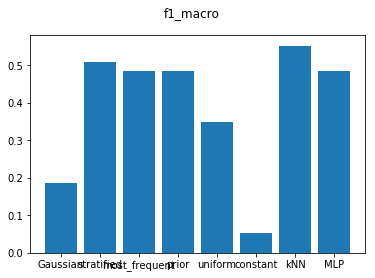

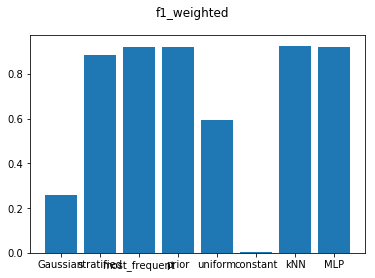

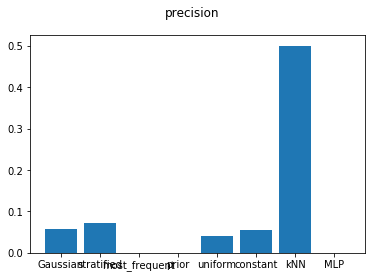

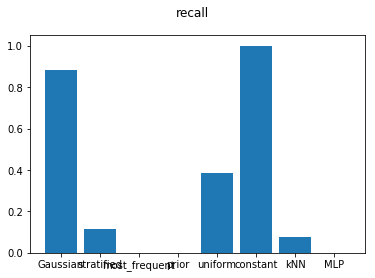

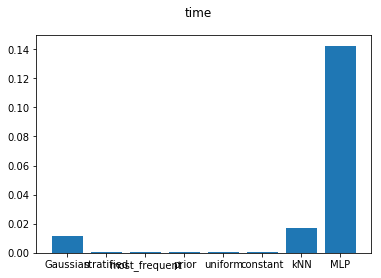

In [131]:
import matplotlib.pyplot as plt

for i in range(0,len(conf)):
    print clf_names[i]
    print conf[i]
    

fig = 1
plt.figure(fig)
plt.suptitle('f1_macro')
plt.bar(range(len(macro)),macro,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('f1_weighted')
plt.bar(range(len(weighted)),weighted,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('precision')
plt.bar(range(len(precision)),precision,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('recall')
plt.bar(range(len(recall)),recall,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('time')
plt.bar(range(len(time_array)),time_array,tick_label=clf_names)



# Hyperparameter Estimation
## Pipeline


In [132]:
from imblearn.pipeline import Pipeline
from sklearn import neighbors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
scaler = StandardScaler()
sampler = RandomOverSampler()
pca = PCA()
classifier = neighbors.KNeighborsClassifier(n_jobs=-1) 
knn_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('pca', pca), ('kNN', classifier)], memory = 'tmp')

In [133]:
knn_pipe.fit(train_data,train_labels)
pred = pipe.predict(test_data)
print classification_report(test_labels, pred)

             precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



In [134]:
clf = MLPClassifier()

mlp_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('pca', pca), ('Mlp', clf)], memory = 'tmp')
mlp_pipe.fit(train_data,train_labels)
pred = pipe.predict(test_data)
print classification_report(test_labels, pred)


             precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



In [135]:
# gaussian Pipeline

opt_conf = []
opt_macro = []
opt_weighted = []
opt_precision = []
opt_recall = []
opt_time_array = []

clf = MLPClassifier()
clf_names = ['Gaussian']
gauss_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('pca', pca), ('Gaussian', clf)], memory = 'tmp')
gauss_pipe.fit(train_data,train_labels)
pred = pipe.predict(test_data)

opt_conf.append( confusion_matrix(test_labels, pred))
opt_macro += [f1_score(test_labels, pred, average='macro')]
opt_weighted.append(  f1_score(test_labels, pred, average='weighted'))
opt_precision.append( precision_score(test_labels, pred))
opt_recall.append(  recall_score(test_labels, pred))

print classification_report(test_labels, pred)


             precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



In [136]:
# for all dummies
dummy_strategies = [ 'stratified', 'most_frequent', 'prior', 'uniform', 'constant']
clf_names += dummy_strategies
print clf_names
dummy_pipes = []
for i in dummy_strategies:
    if (i == 'constant'):
        dummy_classifiers=DummyClassifier(strategy=i, constant=state)
    else:
        dummy_classifiers=DummyClassifier(strategy=i)

    dm_pipe= Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', sampler), ('pca', pca), ('Dummy', dummy_classifiers)], memory = 'tmp')
    dummy_pipes +=[dm_pipe]
    dm_pipe.fit(train_data,train_labels)
    pred = pipe.predict(test_data)
    opt_conf.append( confusion_matrix(test_labels, pred))
    opt_macro += [f1_score(test_labels, pred, average='macro')]
    opt_weighted.append(  f1_score(test_labels, pred, average='weighted'))
    opt_precision.append( precision_score(test_labels, pred))
    opt_recall.append(  recall_score(test_labels, pred))

    print i,":",classification_report(test_labels, pred)

['Gaussian', 'stratified', 'most_frequent', 'prior', 'uniform', 'constant']


stratified :              precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



most_frequent :              precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



prior :              precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



uniform :              precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



constant :              precision    recall  f1-score   support

        0.0       0.98      0.89      0.93       445
        1.0       0.25      0.65      0.36        26

avg / total       0.94      0.87      0.90       471



## Grid Search


In [137]:
# knn Grid Search
from sklearn.model_selection import GridSearchCV

clf_names += ['kNN']
threshold = [0, 0.01, 0.005]
comps = [20, 30, 40, 50, 60]
k = [1, 5, 10, 20, 30, 40]
knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=threshold, pca__n_components=comps, kNN__n_neighbors=k), scoring='f1_macro', n_jobs=-1)

In [138]:
knn_estimator.fit(train_data, train_labels)
pred = knn_estimator.predict(test_data)

opt_conf.append( confusion_matrix(test_labels, pred))
opt_macro += [f1_score(test_labels, pred, average='macro')]
opt_weighted.append(  f1_score(test_labels, pred, average='weighted'))
opt_precision.append( precision_score(test_labels, pred))
opt_recall.append(  recall_score(test_labels, pred))

print classification_report(test_labels, pred)

             precision    recall  f1-score   support

        0.0       0.95      0.92      0.93       445
        1.0       0.14      0.23      0.17        26

avg / total       0.91      0.88      0.89       471



In [139]:
# MLP grid search
clf_names +=["MLP"]
# hidden_layer_opts = range(120,170,20)
# act_opts = ['identity', 'logistic', 'tanh', 'relu']
# solver_opts = ['lbfgs', 'sgd', 'adam']
# learn_opts = ['constant', 'invscaling', 'adaptive']
# alpha_opt =  np.logspace(-5, 3, 5)
# max_iter_opts = range(50, 460, 50)
hidden_layer_opts = [160]
act_opts = [ 'relu']
solver_opts = ['lbfgs']
learn_opts = ['constant',]
alpha_opt =  [0.1]
max_iter_opts = [400]


mlp_estimator   = GridSearchCV(mlp_pipe, param_grid=dict(selector__threshold=threshold, pca__n_components=comps, Mlp__hidden_layer_sizes=hidden_layer_opts, Mlp__activation=act_opts, Mlp__max_iter=max_iter_opts, Mlp__solver=solver_opts, Mlp__learning_rate=learn_opts, Mlp__alpha=alpha_opt ), scoring='f1_macro', n_jobs=-1)

mlp_estimator.fit(train_data, train_labels)

pred = mlp_estimator.predict(test_data)
opt_conf.append( confusion_matrix(test_labels, pred))
opt_macro += [f1_score(test_labels, pred, average='macro')]
opt_weighted.append(  f1_score(test_labels, pred, average='weighted'))
opt_precision.append( precision_score(test_labels, pred))
opt_recall.append(  recall_score(test_labels, pred))

print classification_report(test_labels, pred)



             precision    recall  f1-score   support

        0.0       0.95      0.96      0.96       445
        1.0       0.15      0.12      0.13        26

avg / total       0.90      0.92      0.91       471



time to check our metrics


['Gaussian', 'stratified', 'most_frequent', 'prior', 'uniform', 'constant', 'kNN', 'MLP']
Gaussian
[[394  51]
 [  9  17]]
stratified
[[394  51]
 [  9  17]]
most_frequent
[[394  51]
 [  9  17]]
prior
[[394  51]
 [  9  17]]
uniform
[[394  51]
 [  9  17]]
constant
[[394  51]
 [  9  17]]
kNN
[[408  37]
 [ 20   6]]
MLP
[[428  17]
 [ 23   3]]


<Container object of 8 artists>

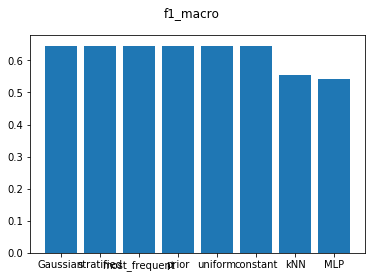

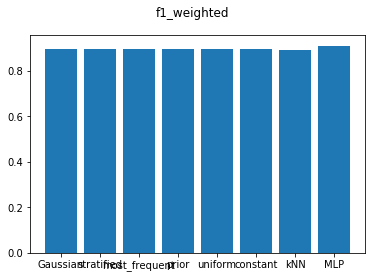

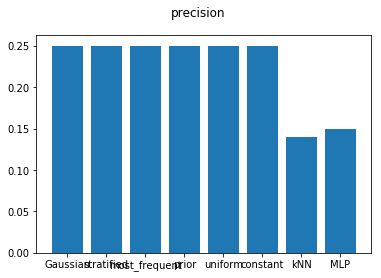

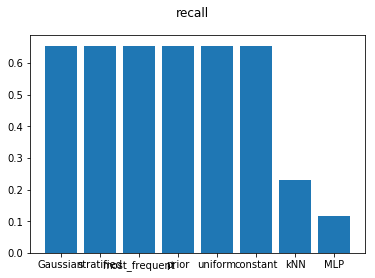

In [140]:

print clf_names

for i in range(0,len(conf)):
    print clf_names[i]
    print opt_conf[i]

fig = 1
plt.figure(fig)
plt.suptitle('f1_macro')
plt.bar(range(len(opt_macro)),opt_macro,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('f1_weighted')
plt.bar(range(len(opt_weighted)),opt_weighted,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('precision')
plt.bar(range(len(opt_precision)),opt_precision,tick_label=clf_names)

fig +=1
plt.figure(fig)
plt.suptitle('recall')
plt.bar(range(len(opt_recall)),opt_recall,tick_label=clf_names)